In [47]:
import pandas as pd

In [48]:
all_data = pd.read_csv("all_data.csv")

all_data.dropna(how= "all", inplace=True)

string_index = all_data[all_data["Order Date"] == "Order Date"].index
all_data.drop(string_index, inplace=True)

all_data["Month"] = all_data["Order Date"].str[:2].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [49]:
all_data["Price Each"] = all_data["Price Each"].astype("float")
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32")

all_data["Sales"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [50]:
columns = ["Sales", "Quantity Ordered"]

sales_per_month = all_data.groupby("Month")[columns].agg("sum")
sales_per_month.head(12)

,Sales,Quantity Ordered
Month,,
1,1822256.73,10903
2,2202022.42,13449
3,2807100.38,17005
4,3390670.24,20558
5,3152606.75,18667
6,2577802.26,15253
7,2647775.76,16072
8,2244467.88,13448
9,2097560.13,13109


In [51]:
import time

s = time.perf_counter()
for i in range(12):
    sales_per_month.iloc[i]["Sales"] / sales_per_month.iloc[i]["Quantity Ordered"]
    #time.sleep(1)
print(f"Time elapsed: {time.perf_counter() - s}")

Time elapsed: 0.00237510004080832


In [52]:
import threading
import time

def avg_price(i):
    sales_per_month.iloc[i]["Sales"] / sales_per_month.iloc[i]["Quantity Ordered"]
    #time.sleep(1)

def main_thread():
    s = time.perf_counter()

    threads = [threading.Thread(target=avg_price, args=(i,)) for i in range(12)]

    for t in threads:
        t.start()
    for t in threads:
        t.join()
    
    print(f"Time elapsed threading: {time.perf_counter() - s}")
    
main_thread()

    



    



Time elapsed threading: 0.008530399994924664


In [53]:
import time

s = time.perf_counter()
sales_per_month.iloc[2]["Sales"] / sales_per_month.iloc[2]["Quantity Ordered"]
#time.sleep(1)
print(f"Time elapsed: {time.perf_counter() - s}")

Time elapsed: 0.0007148999720811844


In [54]:
prices = all_data.groupby('Product').mean()['Price Each']
products = all_data.groupby("Product").sum()
products["Price Each"] = prices
products



C:\Users\toman\AppData\Local\Temp\ipykernel_31708\260320505.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\toman\AppData\Local\Temp\ipykernel_31708\260320505.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products = all_data.groupby("Product").sum()


,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,109.99,29336,454148.71
27in 4K Gaming Monitor,6244,389.99,44440,2435097.56
27in FHD Monitor,7550,149.99,52558,1132424.50
34in Ultrawide Monitor,6199,379.99,43304,2355558.01
AA Batteries (4-pack),27635,3.84,145558,106118.40
AAA Batteries (4-pack),31017,2.99,146370,92740.83
Apple Airpods Headphones,15661,150.00,109477,2349150.00
Bose SoundSport Headphones,13457,99.99,94113,1345565.43
Flatscreen TV,4819,300.00,34224,1445700.00


C:\Users\toman\AppData\Local\Temp\ipykernel_31708\2490949472.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()["Price Each"]
C:\Users\toman\AppData\Local\Temp\ipykernel_31708\2490949472.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amount_sold = all_data.groupby("Product").sum()["Quantity Ordered"]
C:\Users\toman\AppData\Local\Temp\ipykernel_31708\2490949472.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(individual_products, rotation="vertical", size=8)


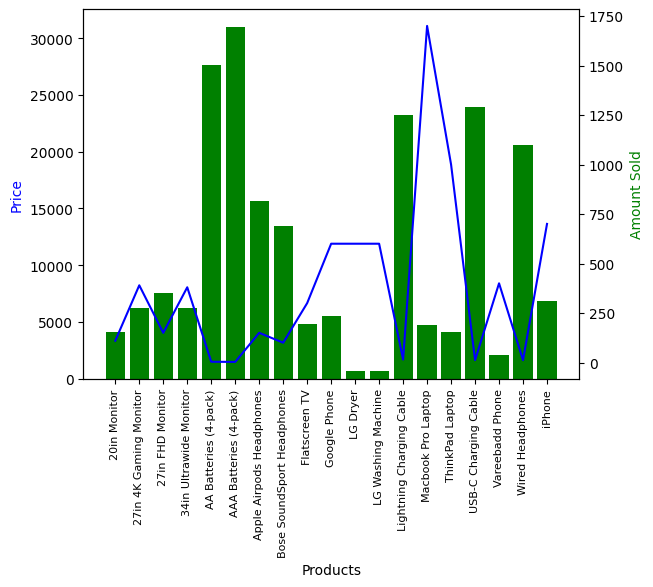

In [97]:
import numpy as np
import matplotlib.pyplot as plt

product_group = all_data.groupby("Product")
prices = all_data.groupby('Product').mean()["Price Each"]
amount_sold = all_data.groupby("Product").sum()["Quantity Ordered"]


individual_products = [key for key, value in product_group]
prices_list = list(prices)
amount_sold_list = [amount for amount in amount_sold]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(individual_products, prices_list, color='b')
ax1.bar(individual_products, amount_sold_list, color="g")

ax1.set_xlabel('Products')
ax1.set_ylabel('Price', color='b')
ax2.set_ylabel('Amount Sold', color='g')

ax1.set_xticklabels(individual_products, rotation="vertical", size=8)

plt.show()












